In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


df=pd.read_csv('D:/churn_model/dataset/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# drop unnecessary Columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [3]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#checking Null values
df.isnull().sum().sort_values(ascending=True)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


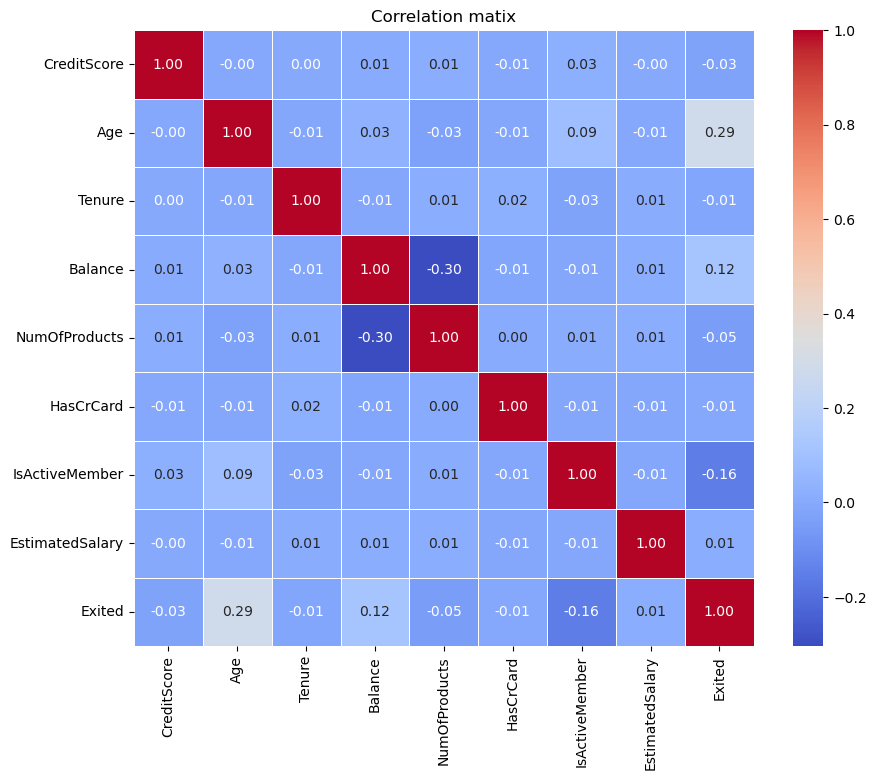

In [6]:
# corelation matrix
num_cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(),annot=True, cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation matix')
plt.show()

> The strongest correlation with the "Exited" variable is with "Age" (positive correlation of 0.29).
> "Balance" has a smaller positive correlation with "Exited" (0.12).
> "IsActiveMember" has a slight negative correlation with "Exited" (-0.16).

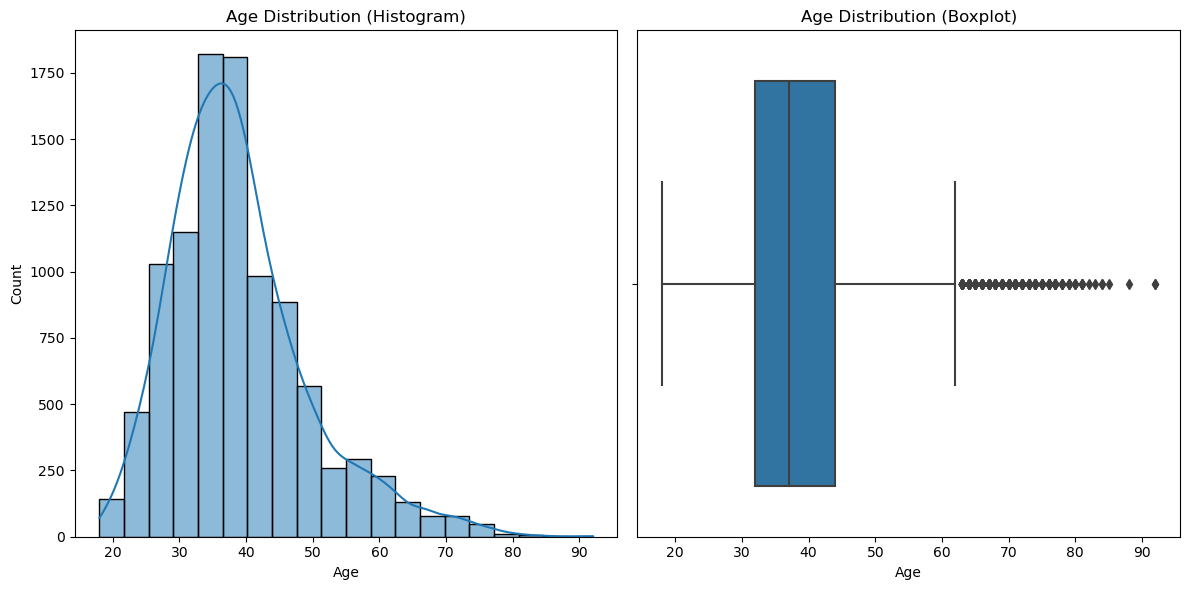

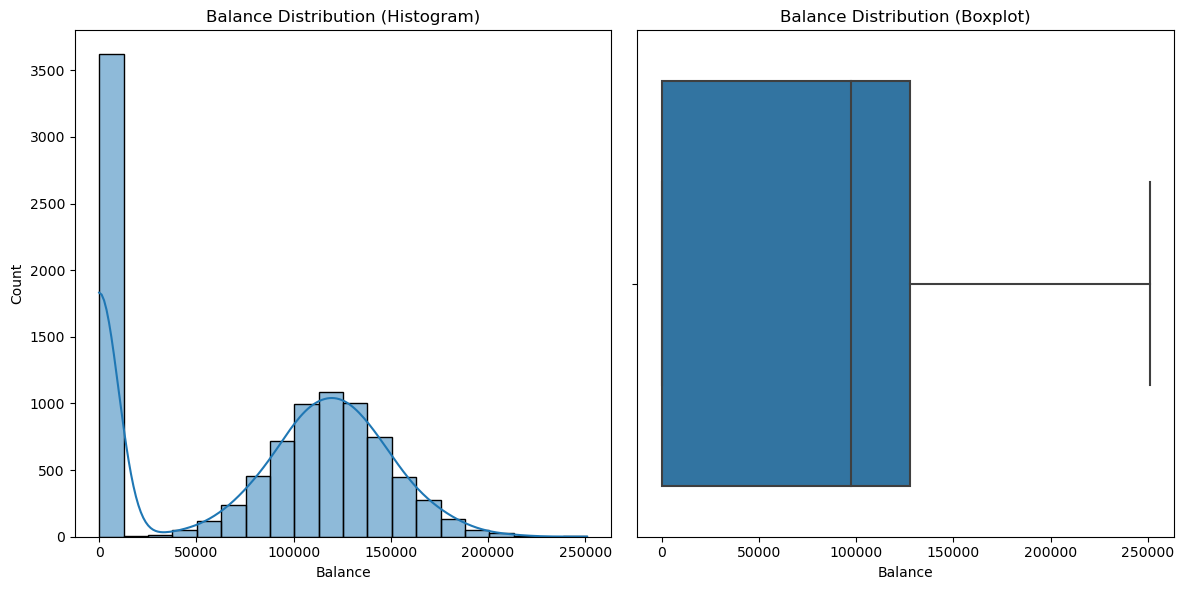

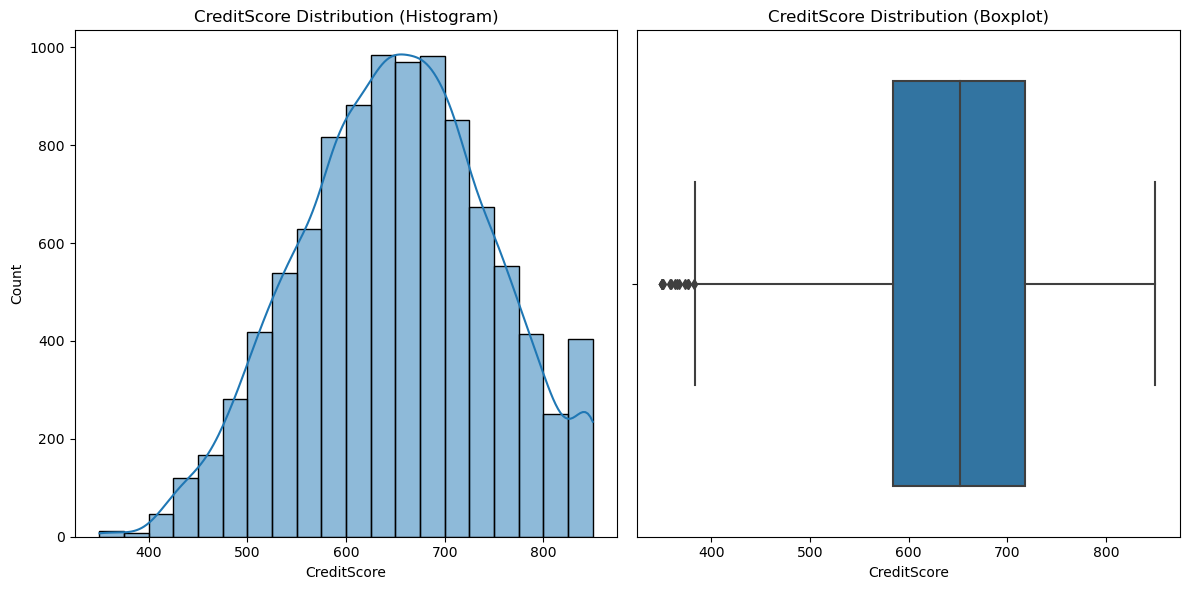

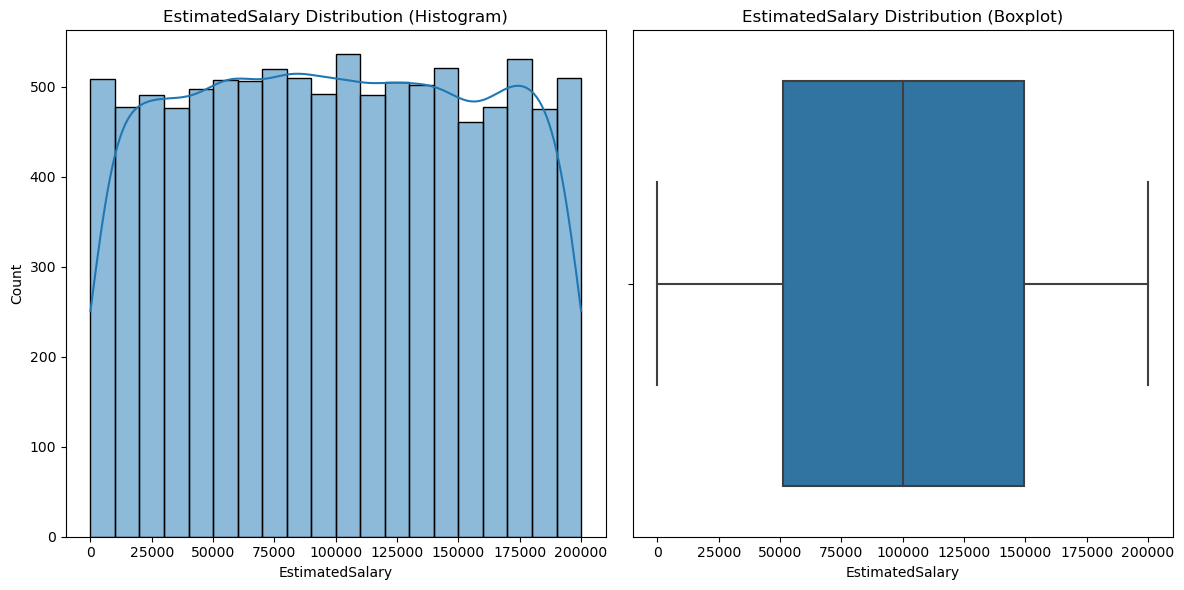

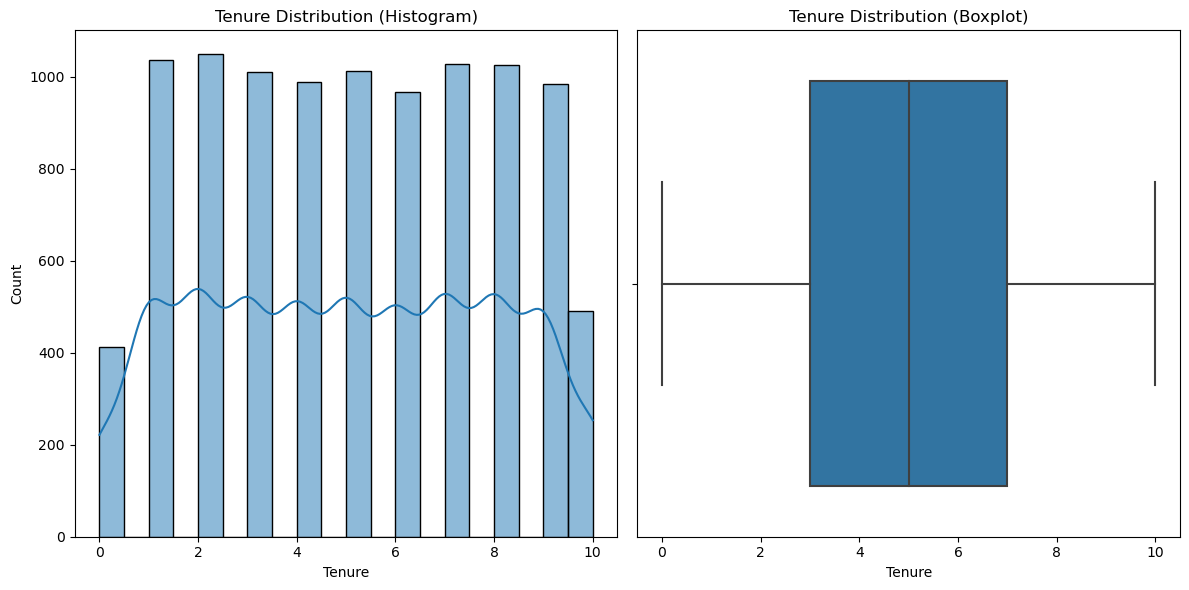

In [7]:
# list of continuous variables
continuous_vars = ['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Tenure']

# Plotting Histograms and Boxplots for each continuous variable
for var in continuous_vars:
    # Create a figure for each variable
    plt.figure(figsize=(12, 6))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True, bins=20)
    plt.title(f'{var} Distribution (Histogram)')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'{var} Distribution (Boxplot)')

    plt.tight_layout()
    plt.show()

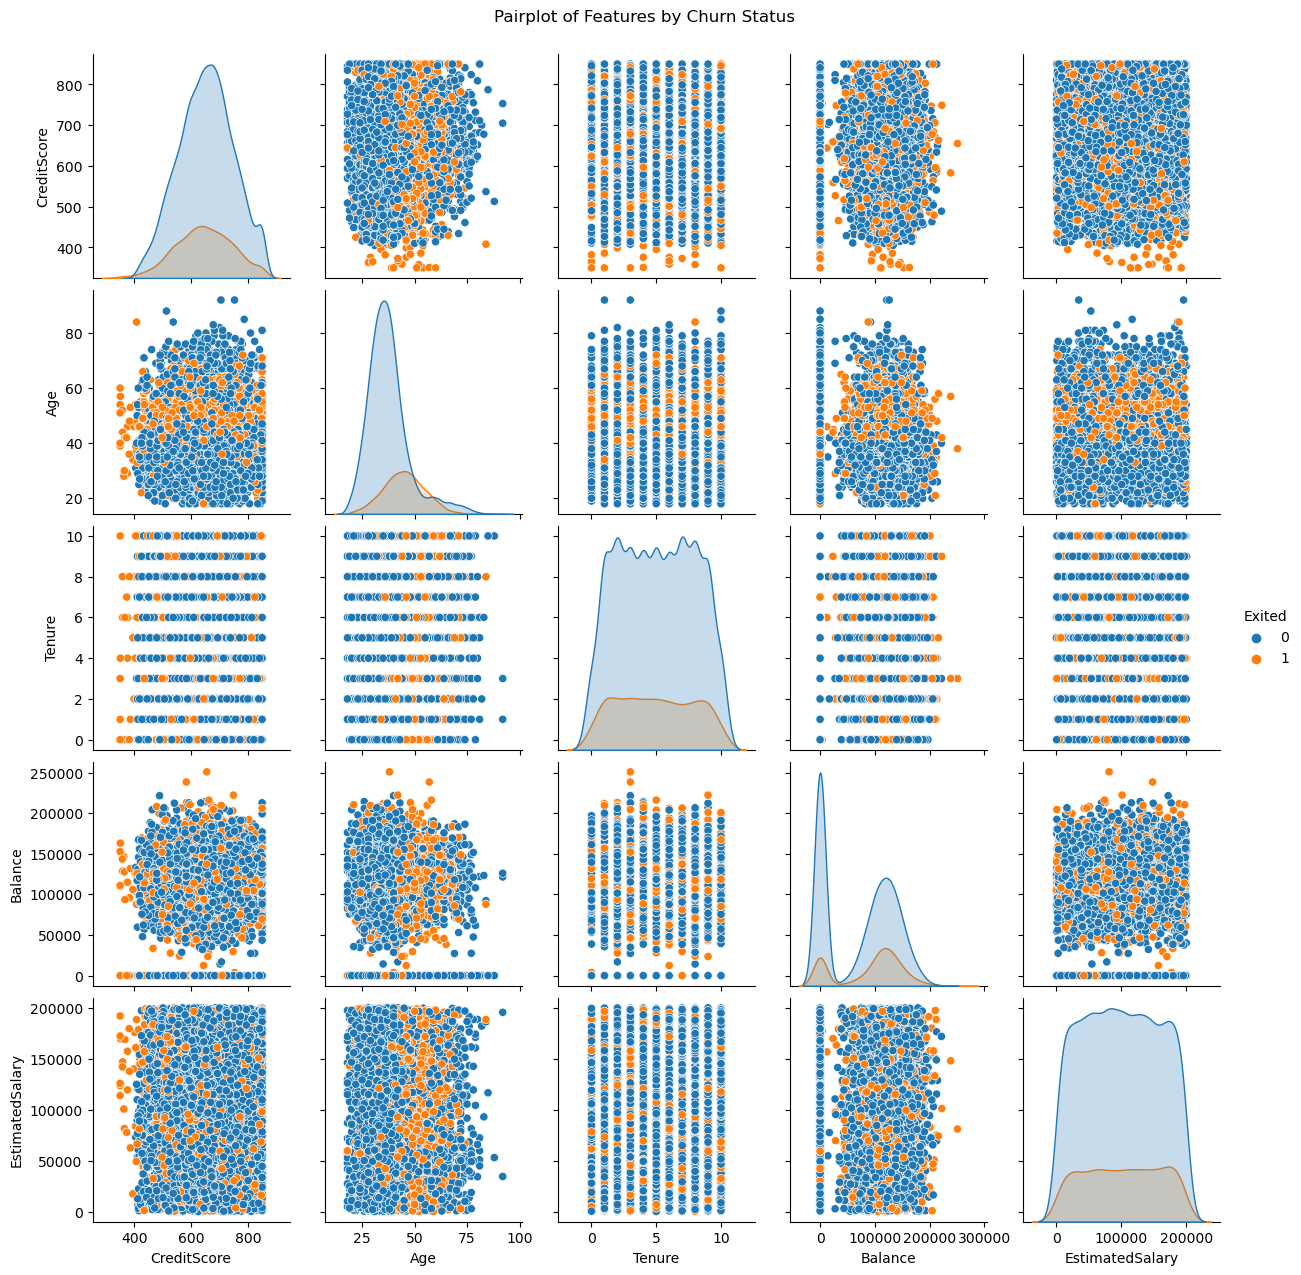

In [8]:
# Pairplot
sns.pairplot(df, hue='Exited', vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
plt.suptitle('Pairplot of Features by Churn Status', y=1.02)
plt.show()

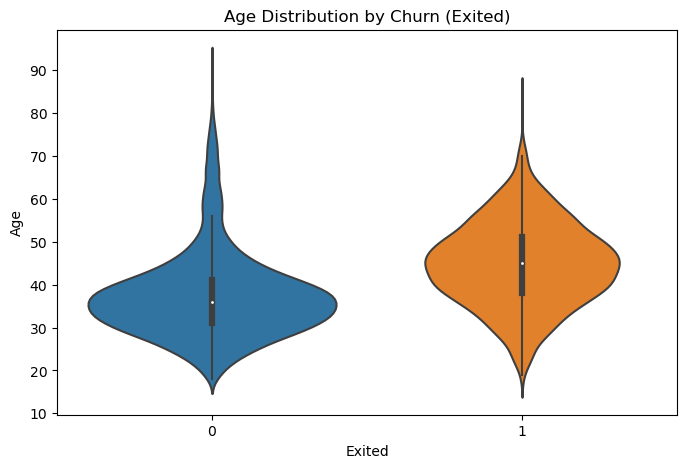

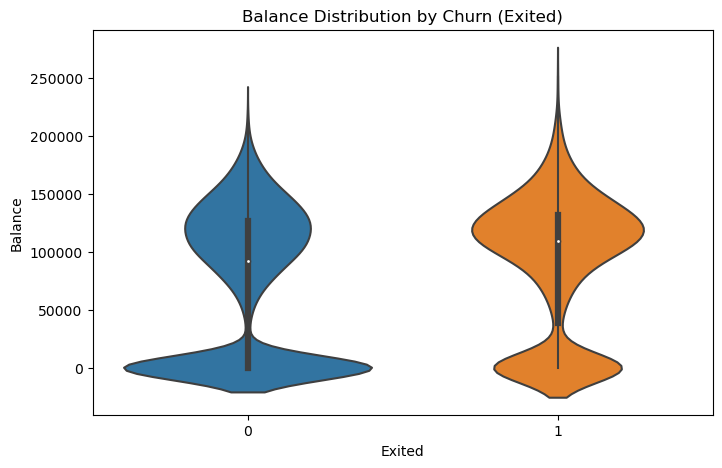

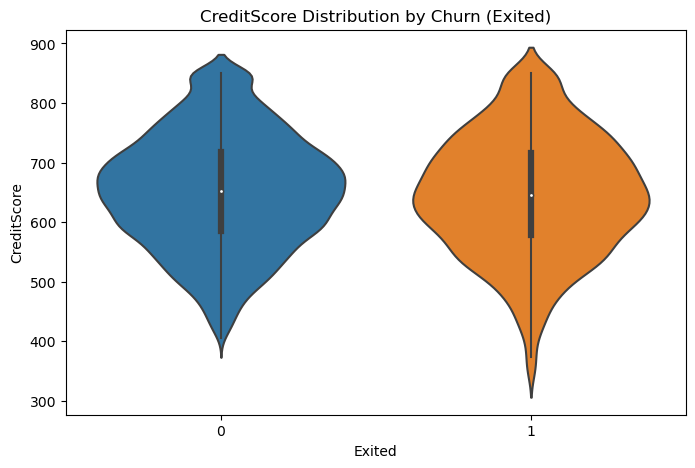

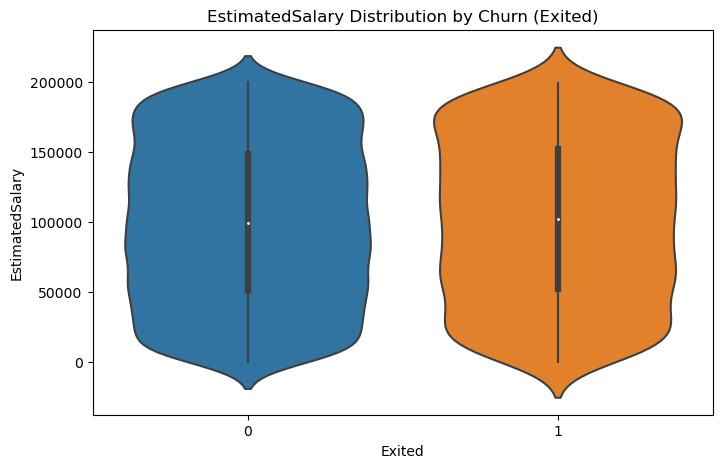

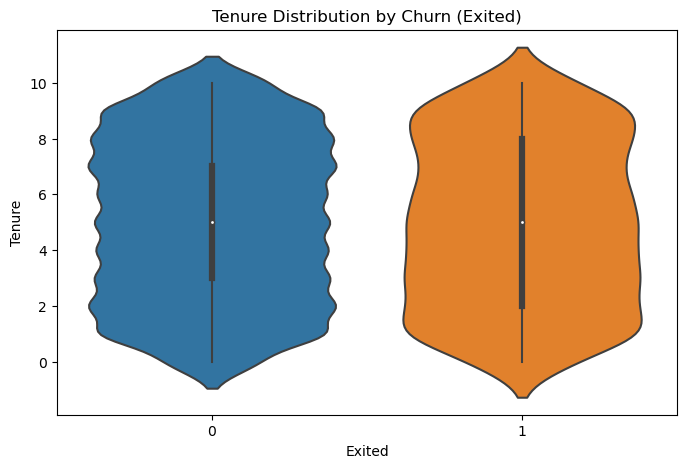

In [9]:
# plotting violin plots for each continuous variable against 'Exited'
for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Exited', y=var, data=df)
    plt.title(f'{var} Distribution by Churn (Exited)')
    plt.show()

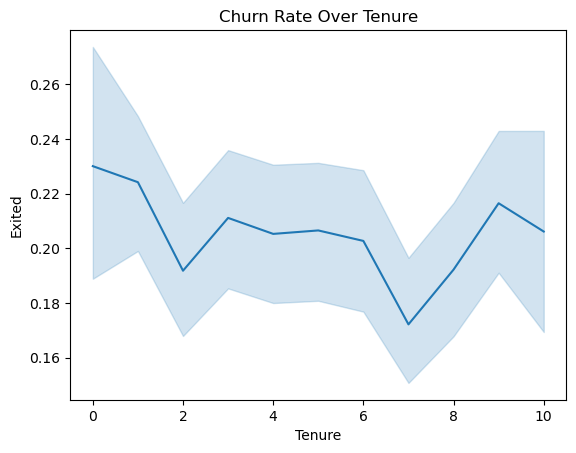

In [10]:
# Churn Rate Over Time
sns.lineplot(x='Tenure', y='Exited', data=df)
plt.title('Churn Rate Over Tenure')
plt.show()

In [11]:
# column transforming data
num_cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
cat_features = ['Geography','Gender']

col_transformer = ColumnTransformer(transformers=[('Onehot',OneHotEncoder(drop='first'),cat_features),
                                                  ('standard',StandardScaler(),num_cols)],remainder='passthrough')
                                                                            # remainder = passthrough means that remaining undefined cols will pass through as it is


In [21]:
X = df.drop('Exited',axis=1)
y = df['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4901,673,France,Male,59,0,178058.06,2,0,1,21063.71
4375,850,Germany,Male,41,8,60880.68,1,1,0,31825.84
6698,725,France,Female,31,6,0.00,1,0,0,61326.43
9805,644,France,Male,33,7,174571.36,1,0,1,43943.09
1101,703,Spain,Male,29,9,0.00,2,1,0,50679.48
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05
5191,682,France,Female,58,1,0.00,1,1,1,706.50
5390,735,France,Female,38,1,0.00,3,0,0,92220.12
860,667,France,Male,43,8,190227.46,1,1,0,97508.04


In [23]:
X_tr_trans = col_transformer.fit_transform(X_train)
X_te_tran = col_transformer.transform(X_test)

In [25]:
X_tr_trans[0]

array([ 0.        ,  0.        ,  1.        ,  0.21835119,  1.91661905,
       -1.73168869,  1.62992801,  0.81311138, -1.38284424,  0.        ,
        1.        ])

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score,recall_score,ConfusionMatrixDisplay

In [28]:
# intializing the model
lr = LogisticRegression()

# train the model
lr.fit(X_tr_trans,y_train)

#predict the model
y_pred = lr.predict(X_te_tran)

# probability of prediction
y_pred_prob = lr.predict_proba(X_te_tran)


In [32]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Prob_stay':y_pred_prob[:,0],'Prob_leave':y_pred_prob[:,1]})

,Actual,Predicted,Prob_stay,Prob_leave
6252,0,0,0.766161,0.233839
4684,0,0,0.923250,0.076750
1731,0,0,0.685492,0.314508
4742,0,0,0.570716,0.429284
4521,0,0,0.932206,0.067794
...,...,...,...,...
4862,0,0,0.628232,0.371768
7025,1,0,0.580114,0.419886
7647,0,0,0.973007,0.026993
7161,0,0,0.745931,0.254069


CNF_Matrix:
 [[1920   83]
 [ 400   97]]



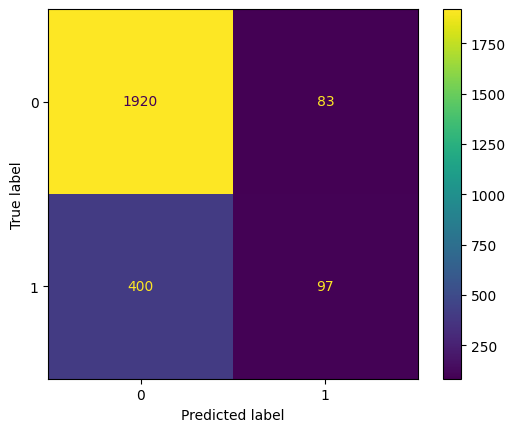

In [36]:
print('CNF_Matrix:\n',confusion_matrix(y_test,y_pred))
print()

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=lr.classes_).plot()
plt.show()

In [37]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
# accuracy score is correct predictions divide by total number of predictions

Accuracy Score: 0.8068


In [38]:
# precision_score
# out of all positive predictions by the model how many are actually positives
print('Precision Score',precision_score(y_test,y_pred))

# TP/TP+FP
97/(83+97)

Precision Score 0.5388888888888889


0.5388888888888889

In [40]:
# recall score
# out of all actual positive how many are truely predicted positive
print('Recall Score:',recall_score(y_test,y_pred))

# TP/TP+FN
97/(97+400)

Recall Score: 0.19517102615694165


0.19517102615694165

In [41]:
# f1 score is the scenario where beta = 1, it means precision and recall are equally important (when data is balance)

# f2 score is the scenario where beta = 2, it means recall is more important than precision (when data is imbalance )

# f0.5 score is the scenario where beta = 0.5, it means precision is more important than recall (when data is imbalance precision is more important than recall)
print('F1 Score:',f1_score(y_test,y_pred))

F1 Score: 0.2865583456425406


In [43]:
import pickle
pickle.dump(lr,open('model_churn.pkl','wb'))

pickle.dump(col_transformer,open('transformer_churn.pkl','wb'))